In [1]:
import pyslise as ps

In [2]:
def V(x):
    return [[cos(x)/max(i, j) + (1/x^i if i == j else 0) for j in [1..4]] for i in [1..4]]


scs = ps.Pyscs(V, 4, 0.1, 1, 2048)

In [93]:
def error1(E):
    l, dl = map(matrix, scs.propagate(E, (matrix.zero(4,4), matrix.identity(4,4)), 0.1, .5)[0])
    r, dr = map(matrix, scs.propagate(E,(matrix.zero(4,4), matrix.identity(4,4)), 1, .5)[0])
    return det(block_matrix([[l, r], [dl, dr]]))

def error2(E):
    left = matrix(scs.propagatePsi(E, matrix.zero(4,4), 0.1,.5))
    right = matrix(scs.propagatePsi(E, matrix.zero(4,4), 1, .5))
    return det(left-right)

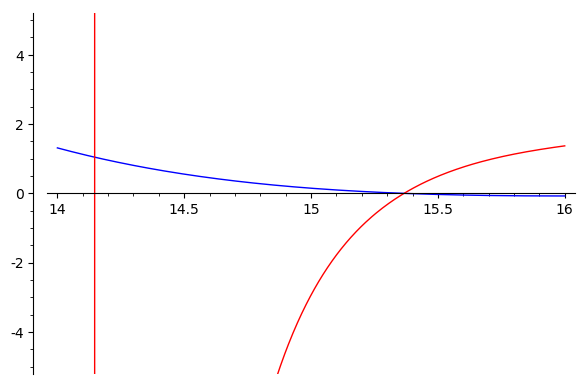

In [94]:
(plot(error1, (14, 16)) + plot(error2, (14, 16), color="red")).show(ymin=-5, ymax=5)

In [95]:
find_root(error2, 55,56)

55.7430968144823